<a href="https://colab.research.google.com/github/ZahraFarahzadii/PV--fault-classification-CNN/blob/main/fault_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import main Libraries
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import os, shutil
import random
from scipy import signal
from sklearn.preprocessing import LabelEncoder,MinMaxScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Reading Data from CSV file
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/data/fault dataset.csv')
df_np=df.to_numpy()
print(df_np.shape)
df

(606528, 6)


,T,A,I,v,p,Class Label
0,10,50,0.896410,16.807684,15.066573,0
1,10,50,0.915625,1.000862,0.916414,0
2,10,50,0.915574,2.000809,1.831887,0
3,10,50,0.915522,3.000755,2.747259,0
4,10,50,0.915471,4.000702,3.662528,0
...,...,...,...,...,...,...
606523,50,1200,-0.000001,345.981547,-0.000432,3
606524,50,1200,-0.000001,346.981494,-0.000434,3
606525,50,1200,-0.000001,347.981441,-0.000435,3
606526,50,1200,-0.000001,348.981387,-0.000436,3


In [ ]:
# print titles and shape
print(df.columns)
x=df_np[0:,0:]
print('x shape:',x.shape)
# Data Description
df.describe()

Index(['T', 'A', 'I', 'v', 'p', 'Class Label'], dtype='object')
x shape: (606528, 6)


,T,A,I,v,p,Class Label
count,606528.000000,606528.000000,606528.000000,606528.000000,606528.000000,606528.000000
mean,30.000000,625.000000,8.963909,175.559954,1349.924254,2.000000
std,12.909955,346.109613,6.796771,101.098589,1345.588719,1.118035
min,10.000000,50.000000,-0.000002,1.000252,-0.000761,0.000000
25%,20.000000,337.500000,2.828402,88.005323,239.707981,1.000000
50%,30.000000,625.000000,7.610000,175.990983,913.373946,2.500000
75%,40.000000,912.500000,14.684600,262.995873,2112.511892,3.000000
max,50.000000,1200.000000,22.917167,421.557215,9477.892555,3.000000


In [ ]:
mu, sigma_I = 0, 2 # mean and standard deviation
mu, sigma_V = 0, 7
# mu, sigma_T = 0, 2
# mu, sigma_A = 0, 2
# s_T = np.random.normal(mu, sigma_T, 606528)
# s_A = np.random.normal(mu, sigma_A, 606528)
s_I = np.random.normal(mu, sigma_I, 606528)
s_V = np.random.normal(mu, sigma_V, 606528)
# x[:,0]=x[:,0]+s_T
# x[:,1]=x[:,1]+s_A
x[:,2]=x[:,2]+s_I
x[:,3]=x[:,3]+s_V
# df['T']=x[:,0]
# df['A']=x[:,1]
df['I']=x[:,2]
df['v']=x[:,3]

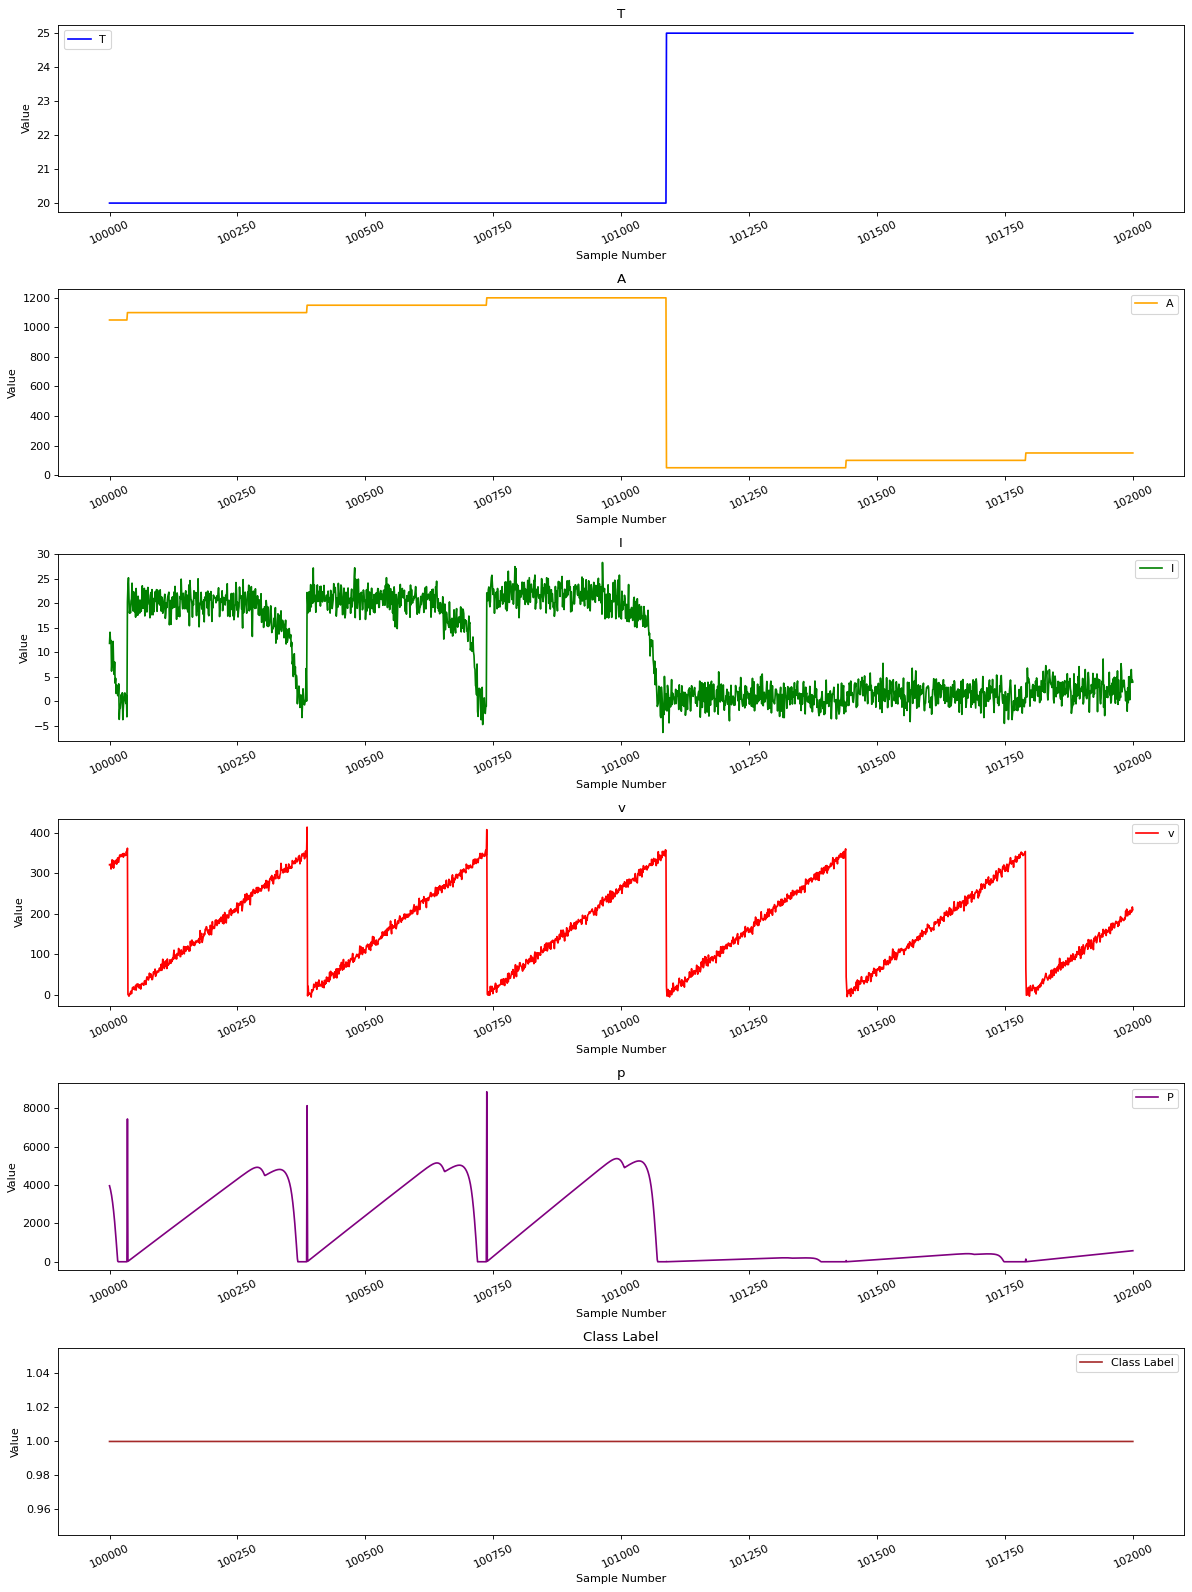

In [ ]:
# Data Visualization
titles = [
    "T",
    "A",
    "I",
    "v",
    "P",
    "Class Label",
]

feature_keys = [
    "T",
    "A",
    "I",
    "v",
    "p",
    "Class Label",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
]

date_time_key = ""


def show_raw_visualization(data):
    # time_data = data[date_time_key]
    fig, axes = plt.subplots(
        nrows=6, ncols=1, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        ax = t_data.plot(
            ax=axes[i],
            color=c,
            title="{}".format(key),
            rot=25,
            xlabel='Sample Number',
            ylabel='Value'
        )

        ax.legend([titles[i]])

    plt.tight_layout()



show_raw_visualization(df[100000:102000])


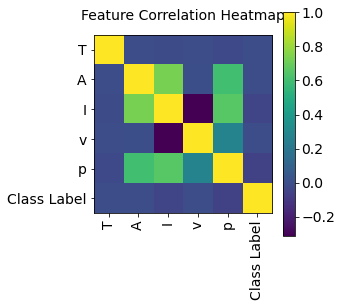

In [ ]:
# This heat map shows the correlation between different features
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    plt.show()


show_heatmap(df)

In [ ]:
#normalizing Data
x = df.values #returns a numpy array

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled)
df_scaled

,0,1,2,3,4,5
0,0.0,0.0,0.237408,0.071267,1.589734e-03,0.0
1,0.0,0.0,0.213100,0.085821,9.676986e-05,0.0
2,0.0,0.0,0.282536,0.079421,1.933603e-04,0.0
3,0.0,0.0,0.241294,0.029485,2.899399e-04,0.0
4,0.0,0.0,0.312982,0.061089,3.865088e-04,0.0
...,...,...,...,...,...,...
606523,1.0,1.0,0.273461,0.822429,3.462858e-08,1.0
606524,1.0,1.0,0.354861,0.804046,3.449670e-08,1.0
606525,1.0,1.0,0.279983,0.827313,3.436481e-08,1.0
606526,1.0,1.0,0.254744,0.828365,3.423303e-08,1.0


In [ ]:
x_scaled[0,5]

0.0

In [ ]:
# dataframe to batches
batch=[]
label=[]
features=[]
y=[]
L=len(x[:,-1])
cnt=0
for i in range(int(L/351)):
  batch=x_scaled[cnt:cnt+351,0:5]
  label=x[cnt:cnt+351,5]
  features.append(batch)
  y.append(int(sum(label)/351))
  cnt=cnt+351

# shuffling data
rnd_seed=42
random.seed(rnd_seed)
random.shuffle(features)
random.seed(rnd_seed)
random.shuffle(y)

# print(y)
# print(features[0])

In [ ]:
#split data
# 80% for train 10% for validation and 10% for test
train=features[0:1384]
y_train=y[0:1384]

valid=features[1384:1556]
y_valid=y[1384:1556]

test=features[1556:1728]
y_test=y[1556:1728]

print('Number of train data is: ',len(train))
print('Number of validation data is: ',len(valid))
print('Number of test data is: ',len(test))

Number of train data is:  1384
Number of validation data is:  172
Number of test data is:  172


(351,)
1


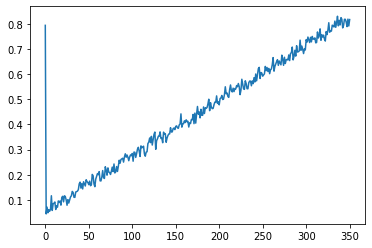

In [ ]:
# Plot a sample and its label
num=45
feature_number=3
print(train[num][:,feature_number].shape)
plt.plot(train[num][:,feature_number])
print(y_train[num])

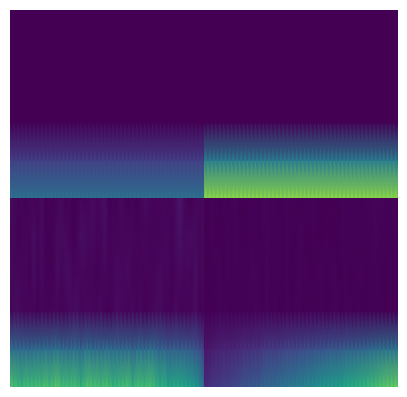

<Figure size 256x256 with 0 Axes>

In [ ]:
# Calculating the STFT of a sample and ploting its STFT Magnitue
feature_number=0
x=train[num][:,feature_number]
fs=360
f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=10,noverlap =4)
Zxx=Zxx[0:6,5:55]
# print(Zxx.shape)
fig = plt.figure(figsize=(5,5),dpi=100)
plt.subplot(2, 2, 1)
plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')
plt.axis('off')

feature_number=1
x=train[num][:,feature_number]
fs=360
f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=10,noverlap =4)
Zxx=Zxx[0:6,5:55]
# print(Zxx.shape)
plt.subplot(2, 2, 2)
plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')
plt.axis('off')

feature_number=2
x=train[num][:,feature_number]
fs=360
f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=10,noverlap =4)
Zxx=Zxx[0:6,5:55]
# print(Zxx.shape)
plt.subplot(2, 2, 3)
plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')
plt.axis('off')

feature_number=3
x=train[num][:,feature_number]
fs=360
f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=10,noverlap =4)
Zxx=Zxx[0:6,5:55]
# print(Zxx.shape)
plt.subplot(2, 2, 4)
plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')
plt.axis('off')

plt.subplots_adjust(hspace = 0,wspace=0)
# plt.figure(figsize=(2.56,2.56),dpi=100)

plt.figure(figsize=(2.56,2.56),dpi=100)

# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.axis('off')
plt.show()
fig.savefig('test.png',bbox_inches='tight',pad_inches=0)

# plt.savefig('test.png',bbox_inches='tight',pad_inches=0)
plt.close()
# print(Zxx.shape)



In [ ]:
# define function converting signal to 2x2 image
# batch is a 351x5 array
def batch2stft(batch,filename='mytest.jpg'):
  f1,f2,f3,f4,f5=0,1,2,3,4   # feature numbers
  fs=360
  fig = plt.figure(figsize=(5,5),dpi=100)

  x=batch[:,f1]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=10,noverlap =4)
  Zxx=Zxx[0:6,0:60]
  plt.subplot(2, 2, 1)
  plt.axis('off')
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')


  x=batch[:,f2]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=10,noverlap =4)
  Zxx=Zxx[0:6,0:60]
  plt.subplot(2, 2, 2)
  plt.axis('off')
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')


  x=batch[:,f3]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=10,noverlap =4)
  Zxx=Zxx[0:6,0:60]
  plt.subplot(2, 2, 3)
  plt.axis('off')
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')


  x=batch[:,f4]
  f, t, Zxx = signal.stft(x, fs,window='hann',nperseg=10,noverlap =4)
  Zxx=Zxx[0:6,0:60]
  plt.subplot(2, 2, 4)
  plt.axis('off')
  plt.pcolormesh(np.abs(Zxx),vmin=0, vmax=1, shading='gouraud')


  # plt.figure(figsize=(2.56,2.56),dpi=100)
  plt.subplots_adjust(hspace = 0,wspace=0)
  # plt.show()
  fig.savefig(filename, bbox_inches='tight',pad_inches=0)

  plt.close()

  return

# batch2stft(train[7],filename='test/mytest01.jpg')

In [ ]:
# making folders for writing stft images in a train and valid folder
# shutil.rmtree('train')
# shutil.rmtree('valid')
os.mkdir('train')
os.mkdir('valid')
os.mkdir('test')

os.mkdir('train/class0')
os.mkdir('train/class1')
os.mkdir('train/class2')
os.mkdir('train/class3')

os.mkdir('valid/class0')
os.mkdir('valid/class1')
os.mkdir('valid/class2')
os.mkdir('valid/class3')

In [ ]:
# savig STFT images

# train images
for i in range(len(train)):
  if y_train[i]==0:
    batch2stft(train[i],filename='train/class0/' + 'train_' + str(i) + '.jpg')
  elif y_train[i]==1:
    batch2stft(train[i],filename='train/class1/' + 'train_' + str(i) + '.jpg')
  elif y_train[i]==2:
    batch2stft(train[i],filename='train/class2/' + 'train_' + str(i) + '.jpg')
  elif y_train[i]==3:
    batch2stft(train[i],filename='train/class3/' + 'train_' + str(i) + '.jpg')

# valid images
for i in range(len(valid)):
  if y_valid[i]==0:
    batch2stft(valid[i],filename='valid/class0/' + 'valid_' + str(i) + '.jpg')
  elif y_valid[i]==1:
    batch2stft(valid[i],filename='valid/class1/' + 'valid_' + str(i) + '.jpg')
  elif y_valid[i]==2:
    batch2stft(valid[i],filename='valid/class2/' + 'valid_' + str(i) + '.jpg')
  elif y_valid[i]==3:
    batch2stft(valid[i],filename='valid/class3/' + 'valid_' + str(i) + '.jpg')

# test images
for i in range(len(test)):
  batch2stft(test[i],filename='test/' + 'test_' + str(i) + '.jpg')

In [ ]:
# Define class path for train and valid images
import os
train_class0_path='train/class0'
train_class1_path='train/class1'
train_class2_path='train/class2'
train_class3_path='train/class3'

valid_class0_path='valid/class0'
valid_class1_path='valid/class1'
valid_class2_path='valid/class2'
valid_class3_path='valid/class3'

train_class0_names = os.listdir(train_class0_path)
train_class1_names = os.listdir(train_class1_path)
train_class2_names = os.listdir(train_class2_path)
train_class3_names = os.listdir(train_class3_path)

valid_class0_names = os.listdir(valid_class0_path)
valid_class1_names = os.listdir(valid_class1_path)
valid_class2_names = os.listdir(valid_class2_path)
valid_class3_names = os.listdir(valid_class3_path)

# Display the number of images of each class
print('total training class0 images:', len(os.listdir(train_class0_path)))
print('total training class1 images:', len(os.listdir(train_class1_path)))
print('total training class2 images:', len(os.listdir(train_class2_path)))
print('total training class3 images:', len(os.listdir(train_class3_path)))

print('total validation class0 images:', len(os.listdir(valid_class0_path)))
print('total validation class1 images:', len(os.listdir(valid_class1_path)))
print('total validation class2 images:', len(os.listdir(valid_class2_path)))
print('total validation class3 images:', len(os.listdir(valid_class3_path)))

total training class0 images: 170
total training class1 images: 345
total training class2 images: 183
total training class3 images: 686
total validation class0 images: 23
total validation class1 images: 45
total validation class2 images: 14
total validation class3 images: 90


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 3

# Index for iterating over images
pic_index = 0

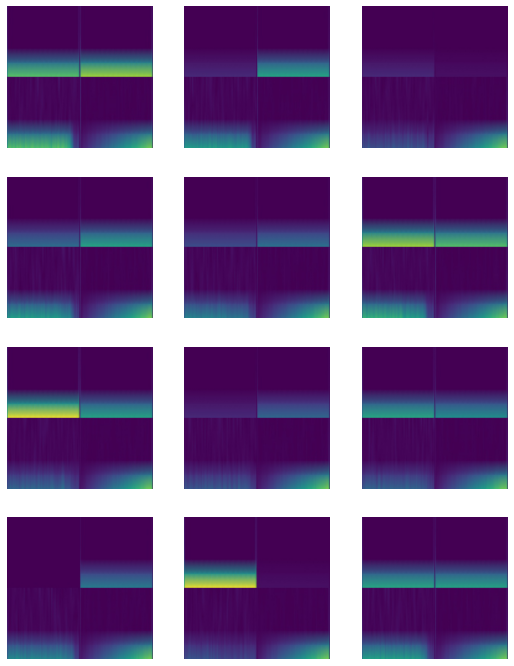

In [ ]:
# Displaying STFT images Prepared for Training
# Set up matplotlib fig, and size it to fit 5x3 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3 , nrows * 3)

pic_index =+ 3
next_class0_pic = [os.path.join(train_class0_path, fname)
                for fname in train_class0_names[pic_index-3:pic_index]]
next_class1_pic = [os.path.join(train_class1_path, fname)
                for fname in train_class1_names[pic_index-3:pic_index]]
next_class2_pic = [os.path.join(train_class2_path, fname)
                for fname in train_class2_names[pic_index-3:pic_index]]
next_class3_pic = [os.path.join(train_class3_path, fname)
                for fname in train_class3_names[pic_index-3:pic_index]]

for i, img_path in enumerate(next_class0_pic + next_class1_pic + next_class2_pic + next_class3_pic ):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K

In [ ]:
# Training STFT Images Using Keras with tensorflow backend
# importing libraries
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras import backend as K

# model.load_weights('model_saved.h5')
img_width, img_height = 384, 384

train_data_dir = 'train'
validation_data_dir = 'valid'
nb_train_samples = 1384
nb_validation_samples = 172
# epochs = 400
batch_size = 200

if K.image_data_format() == 'channels_first':
	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(8, (4, 4), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))
# model.add(BatchNormalization())

model.add(Conv2D(13, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(13, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(4))
model.add(Activation('softmax'))

# Compile Model
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
###

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(rescale=1./255)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'train',  # this is the target directory
        target_size=(384, 384),  # all images will be resized to 150x150
				color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'valid',
        target_size=(384, 384),
				color_mode='rgb',
        batch_size=batch_size,
        class_mode='categorical')


# Fitting the model (Train)
myhistory1=model.fit(train_generator,
        epochs=400,
        validation_data=validation_generator)

model.save("my_model400epoch.h5")


Found 1384 images belonging to 4 classes.
Found 172 images belonging to 4 classes.
Epoch 1/400
7/7 [==============================] - 27s 2s/step - loss: 0.5472 - accuracy: 0.4545 - val_loss: 0.4875 - val_accuracy: 0.5233
Epoch 2/400
7/7 [==============================] - 8s 1s/step - loss: 0.5185 - accuracy: 0.4884 - val_loss: 0.4933 - val_accuracy: 0.5233
Epoch 3/400
7/7 [==============================] - 8s 1s/step - loss: 0.5111 - accuracy: 0.4906 - val_loss: 0.4886 - val_accuracy: 0.5233
Epoch 4/400
7/7 [==============================] - 8s 1s/step - loss: 0.5011 - accuracy: 0.4921 - val_loss: 0.4801 - val_accuracy: 0.5233
Epoch 5/400
7/7 [==============================] - 8s 1s/step - loss: 0.4930 - accuracy: 0.4949 - val_loss: 0.4785 - val_accuracy: 0.5233
Epoch 6/400
7/7 [==============================] - 8s 1s/step - loss: 0.4857 - accuracy: 0.5029 - val_loss: 0.4583 - val_accuracy: 0.5233
Epoch 7/400
7/7 [==============================] - 8s 1s/step - loss: 0.4622 - accuracy:

In [ ]:
# Compile Model
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# Fitting the model (Train)
myhistory2=model.fit(train_generator,
        epochs=200,
        validation_data=validation_generator)

Epoch 1/200
7/7 [==============================] - 9s 1s/step - loss: 0.1323 - accuracy: 0.8779 - val_loss: 0.2992 - val_accuracy: 0.7616
Epoch 2/200
7/7 [==============================] - 8s 1s/step - loss: 0.1238 - accuracy: 0.8988 - val_loss: 0.3151 - val_accuracy: 0.7558
Epoch 3/200
7/7 [==============================] - 8s 1s/step - loss: 0.1105 - accuracy: 0.9025 - val_loss: 0.3124 - val_accuracy: 0.7733
Epoch 4/200
7/7 [==============================] - 8s 1s/step - loss: 0.1176 - accuracy: 0.8981 - val_loss: 0.3219 - val_accuracy: 0.7500
Epoch 5/200
7/7 [==============================] - 8s 1s/step - loss: 0.1277 - accuracy: 0.8945 - val_loss: 0.3340 - val_accuracy: 0.7326
Epoch 6/200
7/7 [==============================] - 8s 1s/step - loss: 0.1208 - accuracy: 0.8952 - val_loss: 0.3065 - val_accuracy: 0.7616
Epoch 7/200
7/7 [==============================] - 8s 1s/step - loss: 0.1285 - accuracy: 0.8916 - val_loss: 0.3112 - val_accuracy: 0.7616
Epoch 8/200
7/7 [=================

In [ ]:
# Evalution model based on 172 STFT sample validation
model.evaluate(validation_generator)

1/1 [==============================] - 1s 860ms/step - loss: 0.4161 - accuracy: 0.7733


[0.41608771681785583, 0.7732558250427246]

In [ ]:
# Evalution model based on 172 STFT sample test
from tensorflow.keras.preprocessing import image
class_names = ['class0','class1','class2','class3']

pred=[]
true=[]
x=[]
cnt=0

# Evalution model based on 172 STFT sample test
from tensorflow.keras.preprocessing import image
class_names = ['class0','class1','class2','class3']

pred=[]
true=[]
x=[]
cnt=0
for i in range(len(y_test)):
  path = 'test/test_'+ str(i) + '.jpg'
  img = image.load_img(path, target_size=(384, 384))
  x = image.img_to_array(img)
  x=x/255
  x = np.expand_dims(x, axis=0)
  mypred = model.predict(x)
  pred.append(mypred)
  if int(np.argmax(mypred))==y_test[i]:
    cnt=cnt+1

print('Accuracy for test data is: ', cnt/len(y_test) )

Accuracy for test data is:  0.7674418604651163


In [ ]:
for i in range(len(y_test)):
  path = 'test/test_'+ str(i) + '.jpg'
  img = image.load_img(path, target_size=(384, 384))
  x = image.img_to_array(img)
  x=x/255
  x = np.expand_dims(x, axis=0)
  mypred = model.predict(x)
  pred.append(mypred)
  if int(np.argmax(mypred))==y_test[i]:
    cnt=cnt+1

In [ ]:
# Model summary layers and parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 381, 381, 8)       392       
                                                                 
 activation (Activation)     (None, 381, 381, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 190, 190, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 189, 189, 13)      429       
                                                                 
 activation_1 (Activation)   (None, 189, 189, 13)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 94, 94, 13)       0         
 2D)                                                    

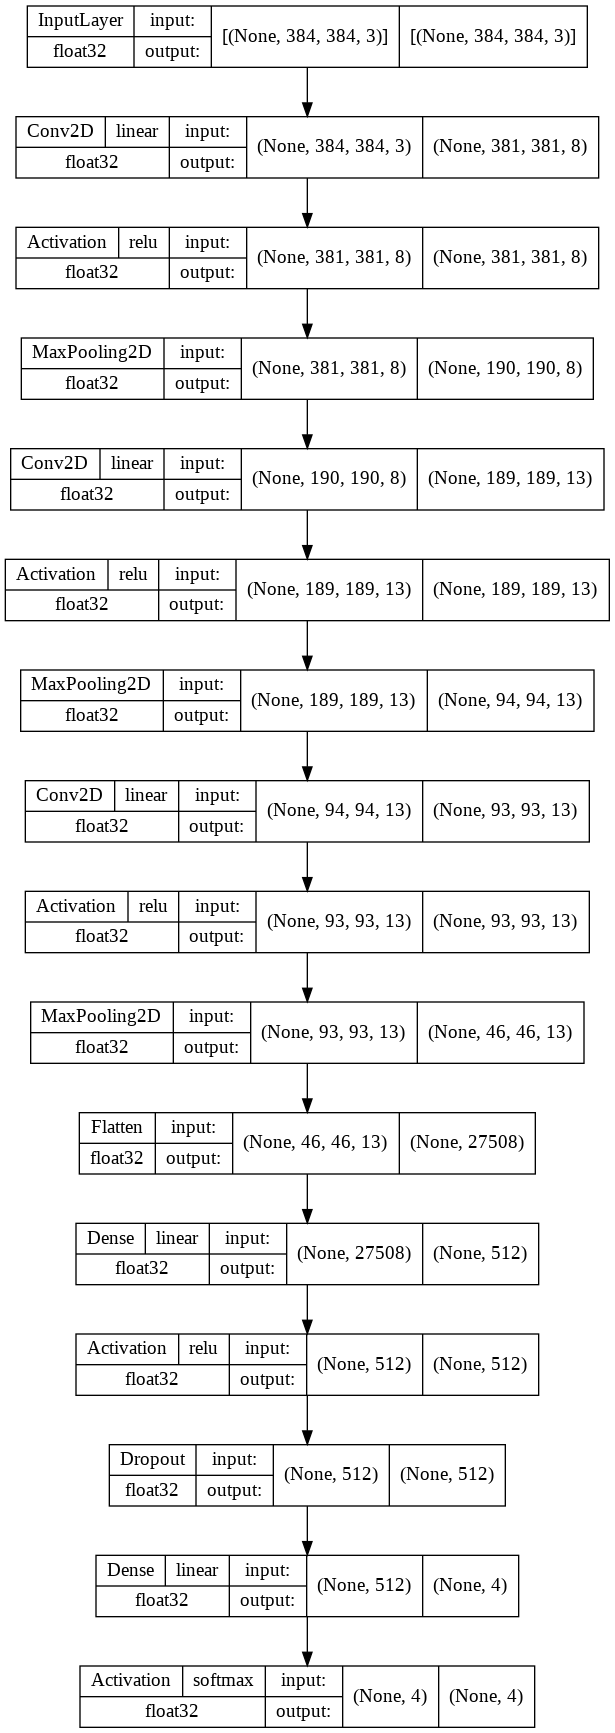

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model_plot.png',show_shapes=True,
           show_dtype=True, show_layer_names=False,rankdir='TB',
           expand_nested=False,dpi=96,layer_range=None,show_layer_activations=True)

In [ ]:
# list all data in history
print(myhistory1.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


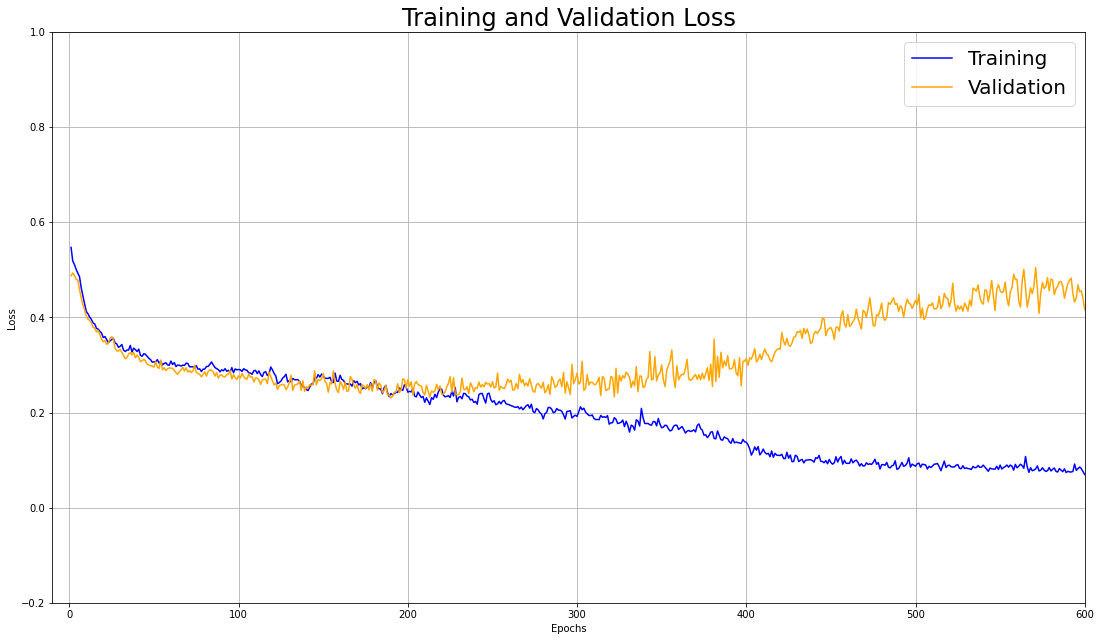

In [ ]:
loss_train1=myhistory1.history['loss']
loss_val1=myhistory1.history['val_loss']
loss_train2=myhistory2.history['loss']
loss_val2=myhistory2.history['val_loss']

#join two list
loss_train=loss_train1 + loss_train2
loss_vall=loss_val1 + loss_val2
epochs=range(1,601)
plt.plot(epochs,loss_train,'blue',label='Training')
plt.plot(epochs,loss_vall,'orange',label='Validation')
plt.rcParams.update({'font.size':20})
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
fig.savefig('loss_curve.png',dpi=100)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim(-10,600)
plt.ylim(-0.2,1)
plt.grid()
plt.legend()
plt.show()

In [ ]:
len(loss_vall)
loss_vall[509]

0.43049392104148865

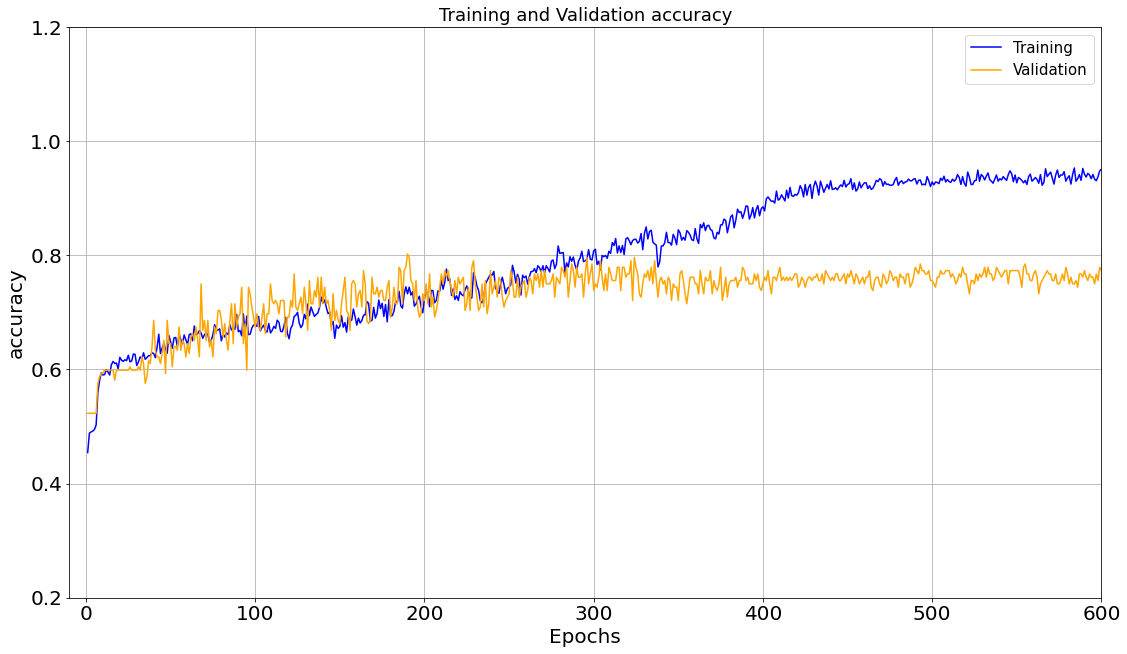

In [ ]:
acc_train1=myhistory1.history['accuracy']
acc_val1=myhistory1.history['val_accuracy']
acc_train2=myhistory2.history['accuracy']
acc_val2=myhistory2.history['val_accuracy']

#join two list
acc_train=acc_train1 + acc_train2
acc_vall=acc_val1 + acc_val2
epochs=range(1,601)
plt.plot(epochs,acc_train,'blue',label='Training')
plt.plot(epochs,acc_vall,'orange',label='Validation')
plt.rcParams.update({'font.size':15})
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
fig.savefig('accuracy_curve.png',dpi=100)
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.xlim(-10,600)
plt.ylim(0.2,1.2)
plt.grid()
plt.legend()
plt.show()

In [ ]:
# plot confusion matris based on Validation data
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

class_names = ['class0','class1','class2','class3']
y_pred=[];y_true=[];
# for cls in range(4):
for i in range(172):
      path = 'test/'+ 'test_' + str(i) + '.jpg'
      img = image.load_img(path, target_size=(384, 384))

      x = image.img_to_array(img)
      x=x/255;
      x = np.expand_dims(x, axis=0)
      mypred = model.predict(x)
      y_pred.append(class_names[np.argmax(mypred)])
      # y_true.append(class_names[cls])



In [ ]:
y_true=['class3',
'class1',
'class3',
'class3',
'class0',
'class3',
'class1',
'class3',
'class3',
'class3',
'class2',
'class2',
'class0',
'class3',
'class3',
'class3',
'class1',
'class3',
'class1',
'class1',
'class0',
'class3',
'class0',
'class3',
'class3',
'class1',
'class3',
'class2',
'class2',
'class3',
'class3',
'class3',
'class3',
'class1',
'class3',
'class3',
'class3',
'class1',
'class3',
'class1',
'class1',
'class3',
'class3',
'class2',
'class3',
'class3',
'class1',
'class1',
'class3',
'class3',
'class1',
'class0',
'class1',
'class2',
'class1',
'class3',
'class1',
'class0',
'class3',
'class3',
'class2',
'class3',
'class1',
'class3',
'class3',
'class3',
'class1',
'class2',
'class3',
'class1',
'class3',
'class3',
'class3',
'class1',
'class3',
'class3',
'class0',
'class3',
'class3',
'class3',
'class1',
'class3',
'class1',
'class2',
'class2',
'class1',
'class2',
'class3',
'class3',
'class3',
'class3',
'class0',
'class3',
'class0',
'class1',
'class3',
'class1',
'class3',
'class0',
'class0',
'class3',
'class1',
'class3',
'class2',
'class3',
'class3',
'class1',
'class3',
'class0',
'class2',
'class1',
'class3',
'class3',
'class3',
'class0',
'class3',
'class1',
'class3',
'class2',
'class2',
'class0',
'class2',
'class0',
'class3',
'class2',
'class3',
'class1',
'class1',
'class3',
'class2',
'class3',
'class3',
'class1',
'class3',
'class3',
'class0',
'class3',
'class1',
'class3',
'class3',
'class1',
'class2',
'class3',
'class3',
'class3',
'class3',
'class1',
'class3',
'class0',
'class3',
'class3',
'class1',
'class1',
'class0',
'class0',
'class0',
'class3',
'class3',
'class0',
'class3',
'class3',
'class3',
'class0',
'class3',
'class1',
'class1',
'class1',
'class1',
'class3',
'class0',
'class1',
'class3'
]

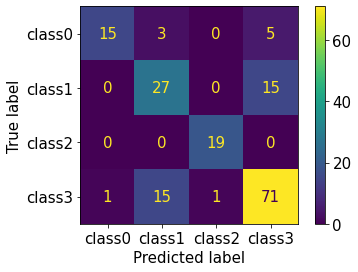

In [ ]:

cm = confusion_matrix(y_true, y_pred, labels=['class0','class1','class2','class3'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class0','class1','class2','class3'])
disp.plot()

In [ ]:
# make a prediction on a test image
from tensorflow.keras.preprocessing import image
class_names = ['class0','class1','class2','class3']
path = 'test/test_4.jpg'
img = image.load_img(path, target_size=(384, 384))
x = image.img_to_array(img)
x=x/255;
x = np.expand_dims(x, axis=0)
mypred = model.predict(x)
print(class_names[np.argmax(mypred)])
print(mypred)
print(y_test[4])

class0
[[9.9495465e-01 3.5268788e-03 8.0549898e-07 1.5175652e-03]]
0
